In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate, signal
from pyproj import Proj,transform
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from bathy_common import *
from matplotlib import path
from salishsea_tools import viz_tools
from netCDF4 import Dataset
import xarray as xr
from salishsea_tools import nc_tools
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


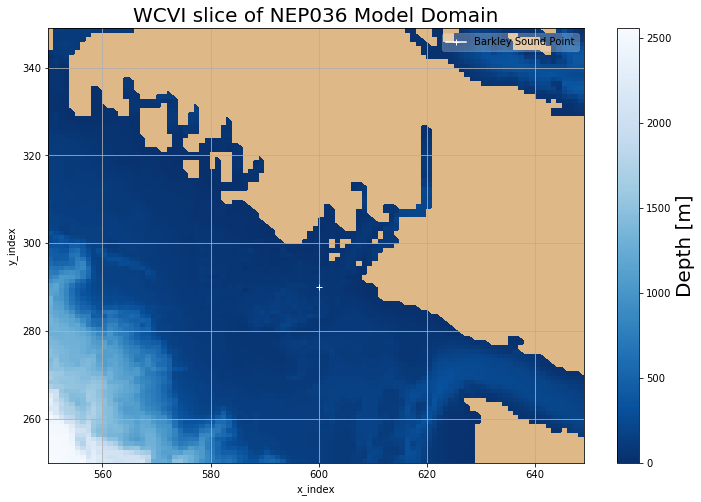

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

# Z = bathy.variables['Bathymetry'][y_wcvi_slice,x_wcvi_slice]
Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(250,350)
x_wcvi_slice = np.arange(550,650)

# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

# z0 = np.ma.masked_values(Z, 0)
# plt.plot(lon[::10,::10],lat[::10,::10],'m.')
cmap = plt.get_cmap('Blues_r')
# cmap.set_bad('gainsboro')
# cmap = cmo.cm.deep
cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax.plot(
    600, 290,
    linestyle='-', marker='+', color='white',
    label='Barkley Sound Point',
)
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
n=20
n1 = 10
# ax.scatter(lon[::n,::n], lat[::n,::n], c='orangered', s=30, alpha=0.6)
# ax.scatter(lon[270:350:n1,550:650:n1], lat[270:350:n1,550:650:n1], c='cyan', s=30, alpha=0.6)
# ax.set_xlim([lon[270:350,550:650].min(), lon[270:350,550:650].max()])
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
# viz_tools.plot_coastline(ax, bathymetry=bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     labelleft='off')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()
# plt.savefig('domain.png')

In [3]:
def tem_sal_timeseries_at_WCVI_locations(grid_scalar):#, j, i):
    
#     temp = grid_scalar.variables['votemper'][0,:, j, i]
#     sal = grid_scalar.variables['vosaline'][0,:, j, i]
    temp = grid_scalar.variables['votemper'][0,:, :, :]
    sal = grid_scalar.variables['vosaline'][0,:, :, :]
    
    scalar_ts = namedtuple('scalar_ts', 'temp, sal')

    return scalar_ts(temp, sal)

In [4]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict
# from datetime import (
#     datetime,
#     timedelta,
# )
# from resource import getrlimit, RLIMIT_NOFILE
import os

# import arrow
# import netCDF4 as nc
# import pandas as pd
# import numpy as np

# import warnings

# from salishsea_tools import hg_commands as hg

# temp_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))
# sal_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))

temp_july = np.empty((31,50,Z.shape[0],Z.shape[1]))
sal_july = np.empty((31,50,Z.shape[0],Z.shape[1]))

i = 0
for file in sorted(glob.glob('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_201507*grid_T.nc')):
#     if fnmatch.fnmatch(file, '*_orig.nc') == False:
#         if fnmatch.fnmatch(file, '*ops_y2015m12d15.nc') == False:
        
#     if file != 'results/forcing/atmospheric/GEM2.5/operational/ops_y2015m04d03_orig.nc':
#     scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file), y_wcvi_slice,x_wcvi_slice)
    scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file))
#             uwind_es = np.append(uwind_es , wind_ts_es[0])
    temp_july[i,...] = scalar_ts[0]
    sal_july[i,...] = scalar_ts[1]
    i = i+1
#     else:
#         continue


MemoryError: 

In [5]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']

In [6]:
zlevels.shape

(50,)

In [58]:
import gsw

### Choose location and time for spice

### INSIDE EDDY


t = 12
j = 265
i = 560

temp_loc_ins = temp_july[t,:20,j,i]
sal_loc_ins = sal_july[t,:20,j,i]

Z_loc = zlevels[:20]
lat_loc = lat[j,i]
lon_loc = lon[j,i]

pressure_loc = gsw.p_from_z(-Z_loc,lat_loc)
SA_loc_ins = gsw.SA_from_SP(sal_loc_ins, pressure_loc, lon_loc, lat_loc)
CT_loc_ins = gsw.CT_from_pt(SA_loc_ins, temp_loc_ins)
rho_loc_ins = gsw.density.rho(SA_loc_ins, CT_loc_ins, pressure_loc) -1000


### OUTSIDE EDDY


t = 12
j = 260
i = 560

temp_loc_os = temp_july[t,:25,j,i]
sal_loc_os = sal_july[t,:25,j,i]

Z_loc = zlevels[:25]
lat_loc = lat[j,i]
lon_loc = lon[j,i]

pressure_loc = gsw.p_from_z(-Z_loc,lat_loc)
SA_loc_os = gsw.SA_from_SP(sal_loc_os, pressure_loc, lon_loc, lat_loc)
CT_loc_os = gsw.CT_from_pt(SA_loc_os, temp_loc_os)
rho_loc_os = gsw.density.rho(SA_loc_os, CT_loc_os, pressure_loc) -1000


#EDDY CENTER

t = 12
i = 265
j= 600

temp_loc_cs = temp_july[t,:25,j,i]
sal_loc_cs = sal_july[t,:25,j,i]

Z_loc = zlevels[:25]
lat_loc = lat[j,i]
lon_loc = lon[j,i]

pressure_loc = gsw.p_from_z(-Z_loc,lat_loc)
SA_loc_cs = gsw.SA_from_SP(sal_loc_cs, pressure_loc, lon_loc, lat_loc)
CT_loc_cs = gsw.CT_from_pt(SA_loc_cs, temp_loc_cs)
rho_loc_cs = gsw.density.rho(SA_loc_cs, CT_loc_cs, pressure_loc) -1000



#EDDY WEST FRONT

t = 12
i = 265
j= 580

temp_loc_f = temp_july[t,:25,j,i]
sal_loc_f = sal_july[t,:25,j,i]

Z_loc = zlevels[:25]
lat_loc = lat[j,i]
lon_loc = lon[j,i]

pressure_loc = gsw.p_from_z(-Z_loc,lat_loc)
SA_loc_f = gsw.SA_from_SP(sal_loc_f, pressure_loc, lon_loc, lat_loc)
CT_loc_f = gsw.CT_from_pt(SA_loc_f, temp_loc_f)
rho_loc_f = gsw.density.rho(SA_loc_f, CT_loc_f, pressure_loc) -1000

In [47]:
SA_loc_cs

array([ 32.26706373,  32.26562312,  32.26169533,  32.25746146,
        32.24436632,  32.24133366,  32.24067079,  32.25027013,
        32.26432071,  32.27877982,  32.29203587,  32.30337686,
        32.31461092,  32.33018599,  32.35468826,  32.39201422,
        32.44725893,  32.52291653,  32.62875134,  32.78288155,
        32.99278179,  33.23192642,  33.46888992,  33.67043302,  33.84418798])

In [ ]:
dens = np.empty((SA_loc.shape[0],SA_loc.shape[0]))

# Loop to fill in grid with densities
for i in np.arange(SA_loc.shape[0]):
        dens[i,i]=gsw.rho(SA_loc[i],CT_loc[i],pressure_loc[i])-1000

In [ ]:
#dens

In [ ]:
# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(SA_loc,CT_loc,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
ax1.plot(SA_loc,temp_loc,'or',markersize=9)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)')

In [ ]:
rho_loc

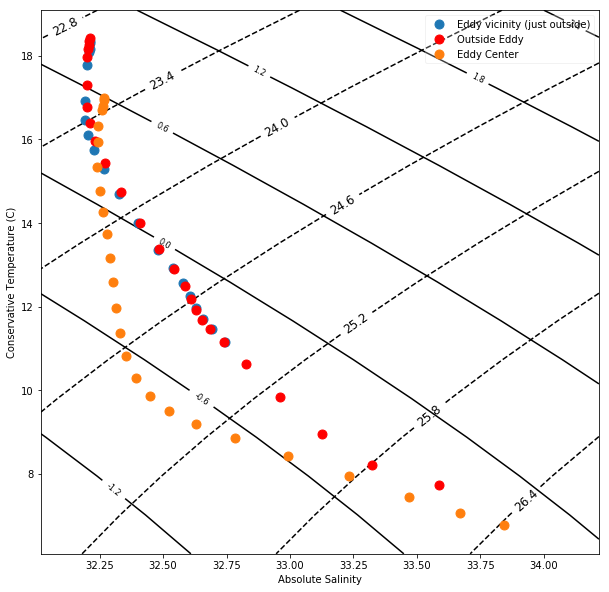

In [60]:
# Figure out boudaries (mins and maxs)
smin = SA_loc_cs.min() - (0.01 * SA_loc_cs.min())
smax = SA_loc_cs.max() + (0.01 * SA_loc_cs.max())
tmin = CT_loc_cs.min() - (0.1 * CT_loc_cs.max())
tmax = CT_loc_cs.max() + (0.1 * CT_loc_cs.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens_1[j,i]=gsw.rho(si[i],ti[j],0)
        spic_1[j,i] = gsw.spiciness0(si[i],ti[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%0.1f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level
 
ax.plot(SA_loc_ins,CT_loc_ins,'o',markersize=9, label='Eddy vicinity (just outside)')

ax.plot(SA_loc_os,CT_loc_os,'or',markersize=9, label = 'Outside Eddy')

ax.plot(SA_loc_cs, CT_loc_cs, 'o' ,markersize=9, label = 'Eddy Center')

# ax.plot(SA_loc_f, CT_loc_f, 'o' ,markersize=9, label = 'Eddy west front')
# ax.set_ylim(5,18)
# ax.set_xlim(30,34)
 
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature (C)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)


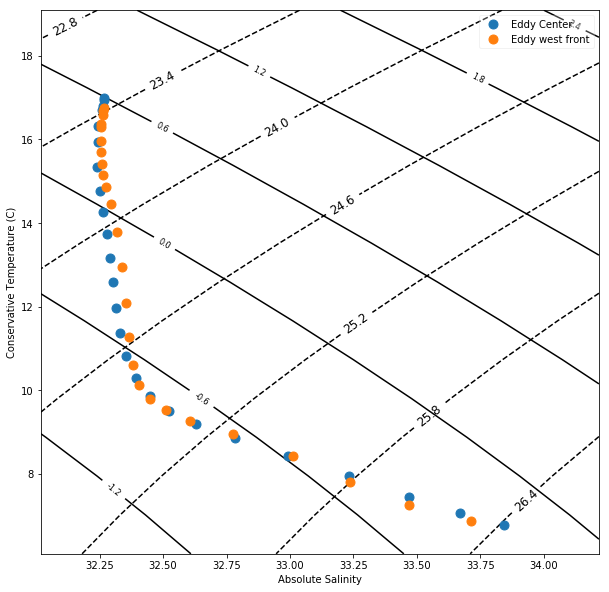

In [61]:
# Figure out boudaries (mins and maxs)
smin = SA_loc_cs.min() - (0.01 * SA_loc_cs.min())
smax = SA_loc_cs.max() + (0.01 * SA_loc_cs.max())
tmin = CT_loc_cs.min() - (0.1 * CT_loc_cs.max())
tmax = CT_loc_cs.max() + (0.1 * CT_loc_cs.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens_1[j,i]=gsw.rho(si[i],ti[j],0)
        spic_1[j,i] = gsw.spiciness0(si[i],ti[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%0.1f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level
 
# ax.plot(SA_loc_ins,CT_loc_ins,'o',markersize=9, label='Eddy vicinity (just outside)')

# ax.plot(SA_loc_os,CT_loc_os,'or',markersize=9, label = 'Outside Eddy')

ax.plot(SA_loc_cs, CT_loc_cs, 'o' ,markersize=9, label = 'Eddy Center')

ax.plot(SA_loc_f, CT_loc_f, 'o' ,markersize=9, label = 'Eddy west front')
# ax.set_ylim(5,18)
# ax.set_xlim(30,34)
 
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature (C)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)


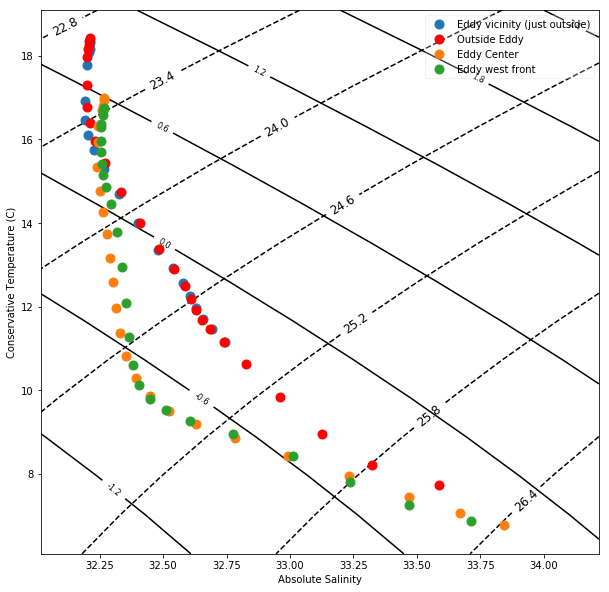

In [59]:
# Figure out boudaries (mins and maxs)
smin = SA_loc_cs.min() - (0.01 * SA_loc_cs.min())
smax = SA_loc_cs.max() + (0.01 * SA_loc_cs.max())
tmin = CT_loc_cs.min() - (0.1 * CT_loc_cs.max())
tmax = CT_loc_cs.max() + (0.1 * CT_loc_cs.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens_1[j,i]=gsw.rho(si[i],ti[j],0)
        spic_1[j,i] = gsw.spiciness0(si[i],ti[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%0.1f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level
 
ax.plot(SA_loc_ins,CT_loc_ins,'o',markersize=9, label='Eddy vicinity (just outside)')

ax.plot(SA_loc_os,CT_loc_os,'or',markersize=9, label = 'Outside Eddy')

ax.plot(SA_loc_cs, CT_loc_cs, 'o' ,markersize=9, label = 'Eddy Center')

ax.plot(SA_loc_f, CT_loc_f, 'o' ,markersize=9, label = 'Eddy west front')
# ax.set_ylim(5,18)
# ax.set_xlim(30,34)
 
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature (C)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)


/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


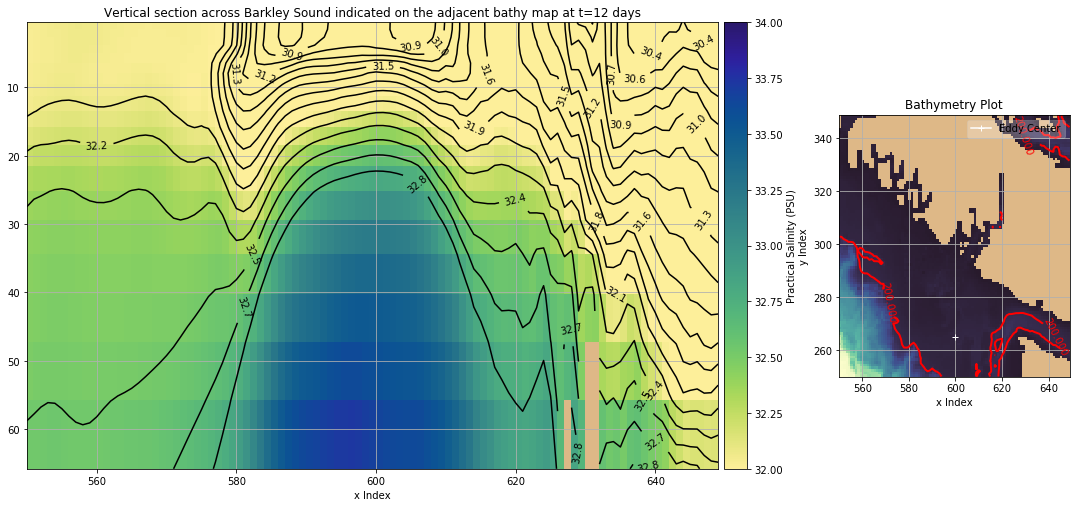

In [53]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_july[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:20])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:20], sal_tzyx[:20,265,x_wcvi_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity (PSU)')
clines = axl.contour(x_wcvi_slice, zlevels[:20], sal_tzyx[:20,265,x_wcvi_slice], np.arange(30, 33, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


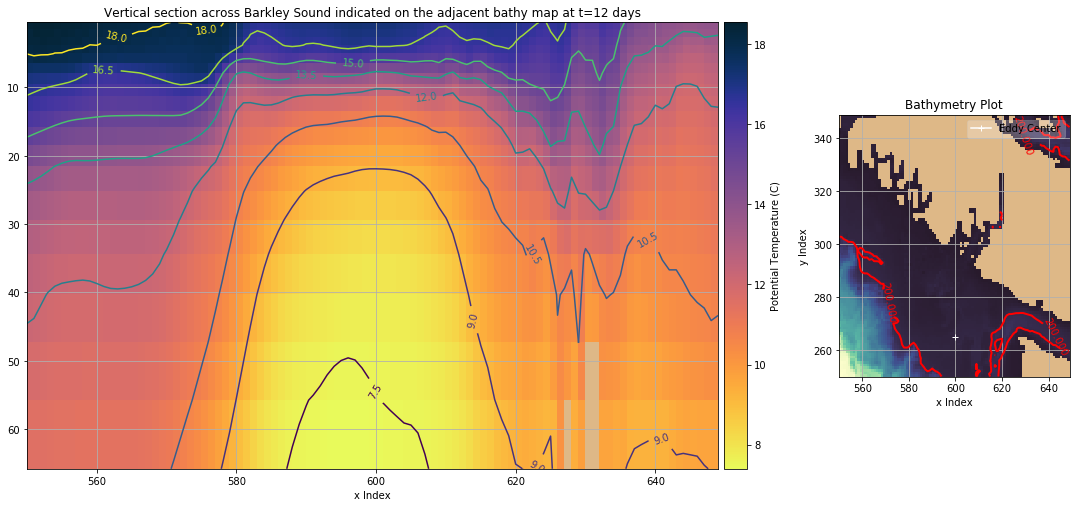

In [52]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.thermal_r)
cmap.set_bad(land_colour)
temp_0 = temp_july[t, :20, :,:]
temp_tzyx = np.ma.masked_values(temp_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:20])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:20], temp_tzyx[:20,265,x_wcvi_slice], cmap=cmap)#, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Potential Temperature (C)')
clines = axl.contour(x_wcvi_slice, zlevels[:20], temp_tzyx[:20,265,x_wcvi_slice])#, np.arange(30, 33, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


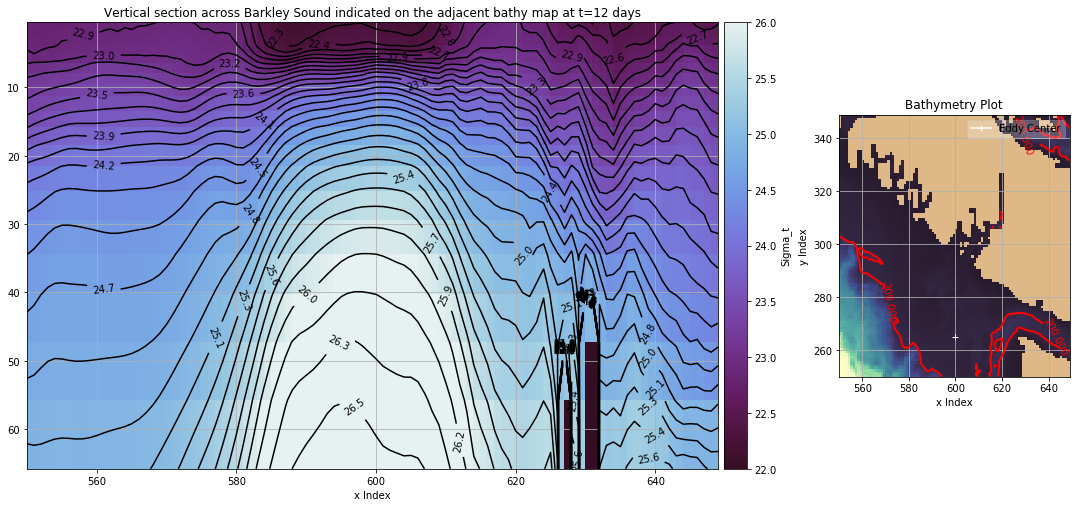

In [54]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.dense_r)
cmap.set_bad(land_colour)
temp_0 = temp_july[t, :20, :,:]
temp_tzyx = np.ma.masked_values(temp_0, 0)

Z_loc = zlevels[:20]
lat_loc = lat[y_wcvi_slice,x_wcvi_slice]
lon_loc = lon[y_wcvi_slice,x_wcvi_slice]

pressure_loc = gsw.p_from_z(-Z_loc,np.mean(lat_loc))
rho_loc = np.empty_like(sal_0)
for i in np.arange(20):
    rho_loc[i] = gsw.density.rho(sal_0[i,...], temp_0[i,...], pressure_loc[i]) -1000

    
rho_tzyx = np.ma.masked_values(rho_loc, 0)    
x, z = np.meshgrid(x_wcvi_slice, zlevels[:20])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:20], rho_tzyx[:20,265,x_wcvi_slice], cmap=cmap, vmin=22, vmax=26)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Sigma_t')
clines = axl.contour(x_wcvi_slice, zlevels[:20], rho_tzyx[:20,265,x_wcvi_slice], np.arange(22, 36, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

In [27]:
B[1,1] = 0;
B[1,2] = 7.7442e-001;
B[1,3] = -5.85e-003;
B[1,4] = -9.84e-004;
B[1,5] = -2.06e-004;

B[2,1] = 5.1655e-002;
B[2,2] = 2.034e-003;
B[2,3] = -2.742e-004;
B[2,4] = -8.5e-006;
B[2,5] = 1.36e-005;

B[3,1] = 6.64783e-003;
B[3,2] = -2.4681e-004;
B[3,3] = -1.428e-005;
B[3,4] = 3.337e-005;
B[3,5] = 7.894e-006;

B[4,1] = -5.4023e-005;
B[4,2] = 7.326e-006;
B[4,3] = 7.0036e-006;
B[4,4] = -3.0412e-006;
B[4,5] = -1.0853e-006;

B[5,1] = 3.949e-007;
B[5,2] = -3.029e-008;
B[5,3] = -3.8209e-007;
B[5,4] = 1.0012e-007;
B[5,5] = 4.7133e-008;

B[6,1] = -6.36e-010;
B[6,2] = -1.309e-009;
B[6,3] = 6.048e-009;
B[6,4] = -1.1409e-009;
B[6,5] = -6.676e-010;


[r,c] = size(t);
sp = zeros(r,c);
s = s - 35.*ones(r,c);
T = 1.*ones(r,c);
for i = np.ara1:6
    S = ones(r,c);
    for j = 1:5
        sp = sp + B(i,j).*T.*S;
        S = S.*s;
    end
    T = T.*t;
  end
spiciness = sp;


array([ 31.0171661 ,  31.01529915,  31.01044267,  31.00094619,
        31.01489193,  31.08296646,  31.22633861,  31.39187396,
        31.56858814,  31.75096647,  31.93387863,  32.12395553,
        32.28951215,  32.46912248,  32.65725531,  32.83673861,
        32.96878634,  33.17094988,  33.3773841 ,  33.50967562,
        33.52774517,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [28]:
CT_loc

array([  1.71563024e+01,   1.70268824e+01,   1.67817615e+01,
         1.62434720e+01,   1.52416679e+01,   1.41370320e+01,
         1.33747340e+01,   1.26694125e+01,   1.21091820e+01,
         1.15737007e+01,   1.10984707e+01,   1.06488951e+01,
         1.02941748e+01,   9.94401857e+00,   9.58314467e+00,
         9.21069215e+00,   8.95589022e+00,   8.57656668e+00,
         8.21644253e+00,   8.00265239e+00,   7.96714940e+00,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,   1.52844796e-02,   1.52844796e-02,
         1.52844796e-02,

In [37]:
import iris
import iris.iterate
import iris.plot as iplt
import matplotlib.pyplot as plt


def main():

    # Load the gridded temperature and salinity data.
    fname = iris.sample_data_path('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20150712_00433440_grid_T.nc')
    cubes = iris.load(fname)
    theta, = cubes.extract('Temperature')
    salinity, = cubes.extract('Salinity')

    # Extract profiles of temperature and salinity from a particular point in
    # the southern portion of the domain, and limit the depth of the profile
    # to 1000m.
    lon_cons = iris.Constraint(longitude=330.5)
    lat_cons = iris.Constraint(latitude=lambda l: -10 < l < -9)
    depth_cons = iris.Constraint(depth=lambda d: d <= 1000)
    theta_1000m = theta.extract(depth_cons & lon_cons & lat_cons)
    salinity_1000m = salinity.extract(depth_cons & lon_cons & lat_cons)

    # Plot these profiles on the same set of axes. In each case we call plot
    # with two arguments, the cube followed by the depth coordinate. Putting
    # them in this order places the depth coordinate on the y-axis.
    # The first plot is in the default axes. We'll use the same color for the
    # curve and its axes/tick labels.
    fig = plt.figure(figsize=(5, 6))
    temperature_color = (.3, .4, .5)
    ax1 = plt.gca()
    iplt.plot(theta_1000m, theta_1000m.coord('depth'), linewidth=2,
              color=temperature_color, alpha=.75)
    ax1.set_xlabel('Potential Temperature / K', color=temperature_color)
    ax1.set_ylabel('Depth / m')
    for ticklabel in ax1.get_xticklabels():
        ticklabel.set_color(temperature_color)
    # To plot salinity in the same axes we use twiny(). We'll use a different
    # color to identify salinity.
    salinity_color = (.6, .1, .15)
    ax2 = plt.gca().twiny()
    iplt.plot(salinity_1000m, salinity_1000m.coord('depth'), linewidth=2,
              color=salinity_color, alpha=.75)
    ax2.set_xlabel('Salinity / PSU', color=salinity_color)
    for ticklabel in ax2.get_xticklabels():
        ticklabel.set_color(salinity_color)
    plt.tight_layout()
    plt.show()

    # Now plot a T-S diagram using scatter. We'll use all the profiles here,
    # and each point will be coloured according to its depth.
    plt.figure(figsize=(6, 6))
    depth_values = theta.coord('depth').points
    for s, t in iris.iterate.izip(salinity, theta, coords='depth'):
        iplt.scatter(s, t, c=depth_values, marker='+', cmap='RdYlBu_r')
    ax = plt.gca()
    ax.set_xlabel('Salinity / PSU')
    ax.set_ylabel('Potential Temperature / K')
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('Depth / m')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()

ImportError: No module named 'iris'

In [39]:
np.min(SA_loc)

0.0

In [46]:
sal_loc[20]

33.367267608642578

In [55]:
zlevels[:20]

array([  0.49402538,   1.5413754 ,   2.64566851,   3.81949472,
         5.07822371,   6.44061422,   7.92956018,   9.57299709,
        11.40500259,  13.46713829,  15.8100729 ,  18.49555969,
        21.59881592,  25.21140862,  29.44472885,  34.43415451,
        40.34405136,  47.37368774,  55.76428986,  65.80727386], dtype=float32)

In [33]:
pressure_loc.shape

(20,)